In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df.head()

,X,Y
0,-10.000000,107.450712
1,-9.661017,91.261284
2,-9.322034,96.615644
3,-8.983051,103.540650
4,-8.644068,71.207607


In [4]:
df.isnull().sum()

X    0
Y    0
dtype: int64

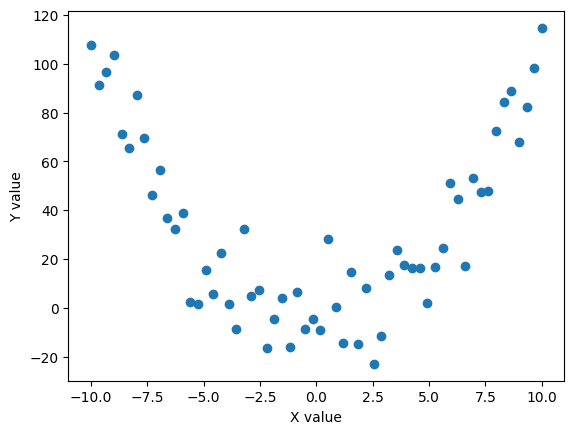

In [5]:
x=df[['X']]
y=df['Y']
plt.scatter(x,y)
plt.xlabel("X value")
plt.ylabel("Y value")
plt.show()

R2 score : -0.14006350342140927


/home/khushi/Desktop/khushi_module/env/lib/python3.12/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


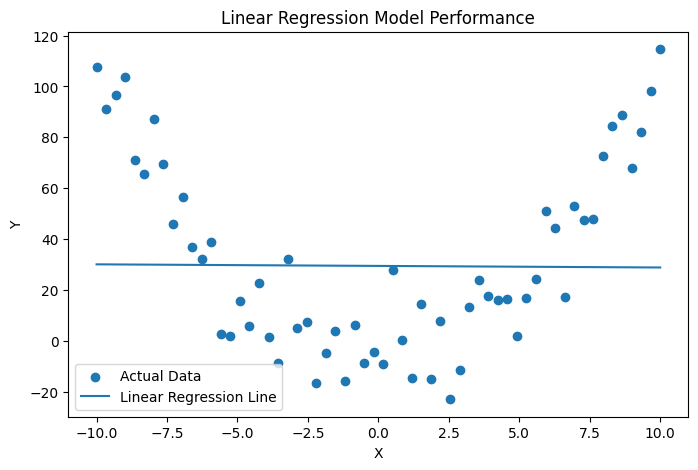

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# train-test split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)


model = LinearRegression()
model.fit(x_train,y_train)

y_pr = model.predict(x_test)
print(f'R2 score : {r2_score(y_test , y_pr)}')

#performance graph
x_line = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
y_line = model.predict(x_line)

# plot
plt.figure(figsize=(8, 5))

# actual data
plt.scatter(x, y, label="Actual Data")

# regression line
plt.plot(x_line, y_line, label="Linear Regression Line")

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Linear Regression Model Performance")
plt.legend()
plt.show()


# polynomial Regression

/home/khushi/Desktop/khushi_module/env/lib/python3.12/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


R2 score: 0.8974484023236124


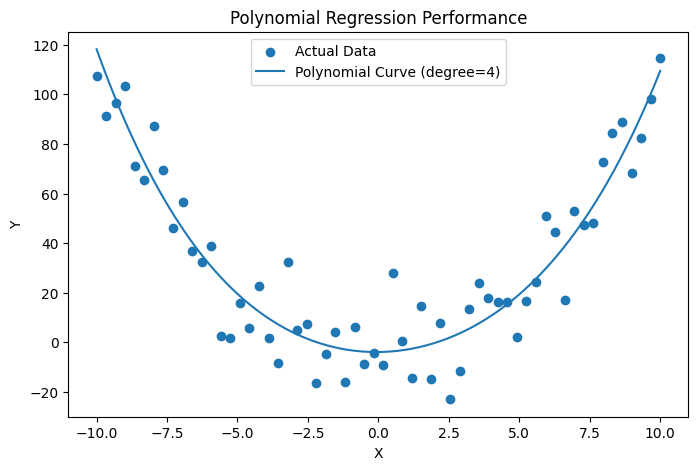

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# train-test split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

# polynomial features
poly = PolynomialFeatures(degree=4)
x_poly_train = poly.fit_transform(x_train)
x_poly_test = poly.transform(x_test)

# model
model = LinearRegression()
model.fit(x_poly_train, y_train)

# predictions for test set (performance)
y_pred = model.predict(x_poly_test)

# smooth curve for visualization
x_range = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
x_range_poly = poly.transform(x_range)
y_range_pred = model.predict(x_range_poly)

# R2 score (ONLY test data)
print("R2 score:", r2_score(y_test, y_pred))

# plot
plt.figure(figsize=(8, 5))
plt.scatter(x, y, label="Actual Data")
plt.plot(x_range, y_range_pred, label="Polynomial Curve (degree=4)")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Polynomial Regression Performance")
plt.legend()
plt.show()
